# Explore here

Este conjunto de datos proviene originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo es predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.

Pregnancies. Número de embarazos del paciente (numérico)

Glucose. Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa (numérico)

BloodPressure. Presión arterial diastólica (medida en mm Hg) (numérico)

SkinThickness. Grosor del pliegue cutáneo del tríceps (medida en mm) (numérico)

Insulin. Insulina sérica de 2 horas (medida en mu U/ml) (numérico)

BMI. Índice de masa corporal (numérico)

DiabetesPedigreeFunction. Función de pedigrí de diabetes (numérico)

Age. Edad del paciente (numérico)

Outcome. Variable de clase (0 o 1), siendo 0 negativo en diabetes y 1, positivo (numérico)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
datacore = data.copy()
data1 = data.copy()
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Las siguientes variables tienen mínimos de 0, lo cual es clínicamente inválido:

   -Min 0 es invalido medicamente para los niveles de glucosa. 

   -Min 0 es irreal para lavaribele BloodPresure.

   -Min 0 es irreal para la variable de indice de masa coorporal.
   
   -Min 0 es irreal en la variable SkinThickness representa el grosor del pliegue cutáneo en milímetros, es decir todos tenemos al menos 1 milimetro de grasa coorporal.

Glucose	Muy importante. Va de 0 a 199. El percentil 75 ya está en 140.25. Glucosa elevada suele asociarse fuertemente con diabetes.

BMI	Va hasta 67.1. Un BMI > 30 indica obesidad. La media (31.99) sugiere sobrepeso generalizado.

DiabetesPedigreeFunction	Va de 0.078 a 2.42. Cuanto más alto, más historial familiar. Podría ser una variable significativa. A continuacion limpiamos datos.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#datacore = datacore.drop( )
datacore.drop(labels=datacore[datacore["Glucose"] == 0 ].index, inplace=True)
datacore.drop(labels=datacore[datacore["BloodPressure"] == 0 ].index, inplace=True)
datacore.drop(labels=datacore[datacore["BMI"] == 0 ].index, inplace=True)
datacore.drop(labels=datacore[datacore["SkinThickness"] == 0 ].index, inplace=True)
datacore.drop(labels=datacore[datacore["Insulin"] == 0 ].index, inplace=True)

In [8]:
datacore["Outcome"].value_counts()

Outcome
0    262
1    130
Name: count, dtype: int64

Nuestros datos de la variable objetivo estan desvalanceados, seria bueno ponderar la importancia de los datos mayoritarios con respecto a los datos minoritarios para corregir este desvalance

/tmp/ipykernel_6063/464756723.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diabetes_por_edad = datacore.groupby("AgeGroup")["Outcome"].mean().reset_index()


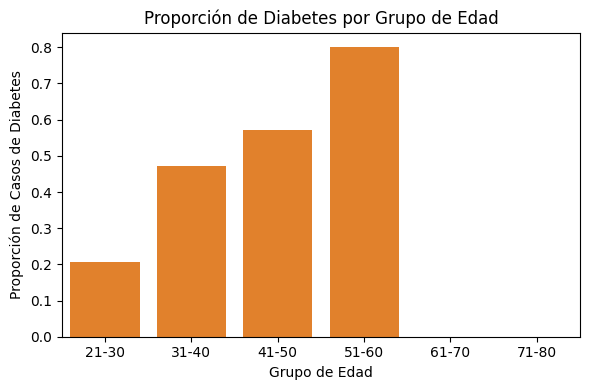

In [9]:
# Crear grupos de edad
datacore["AgeGroup"] = pd.cut(datacore["Age"], bins=[20, 30, 40, 50, 60, 70, 80], 
                              labels=["21-30", "31-40", "41-50", "51-60", "61-70", "71-80"])

# Calcular proporción de Outcome = 1 (diabetes) por grupo de edad
diabetes_por_edad = datacore.groupby("AgeGroup")["Outcome"].mean().reset_index()

# Crear gráfico
fig, ax = plt.subplots(figsize=(6, 4))
sns.barplot(data=diabetes_por_edad, x="AgeGroup", y="Outcome", color="#ff7f0e", ax=ax)

# Títulos
ax.set_title("Proporción de Diabetes por Grupo de Edad")
ax.set_ylabel("Proporción de Casos de Diabetes")
ax.set_xlabel("Grupo de Edad")

plt.tight_layout()
plt.show()

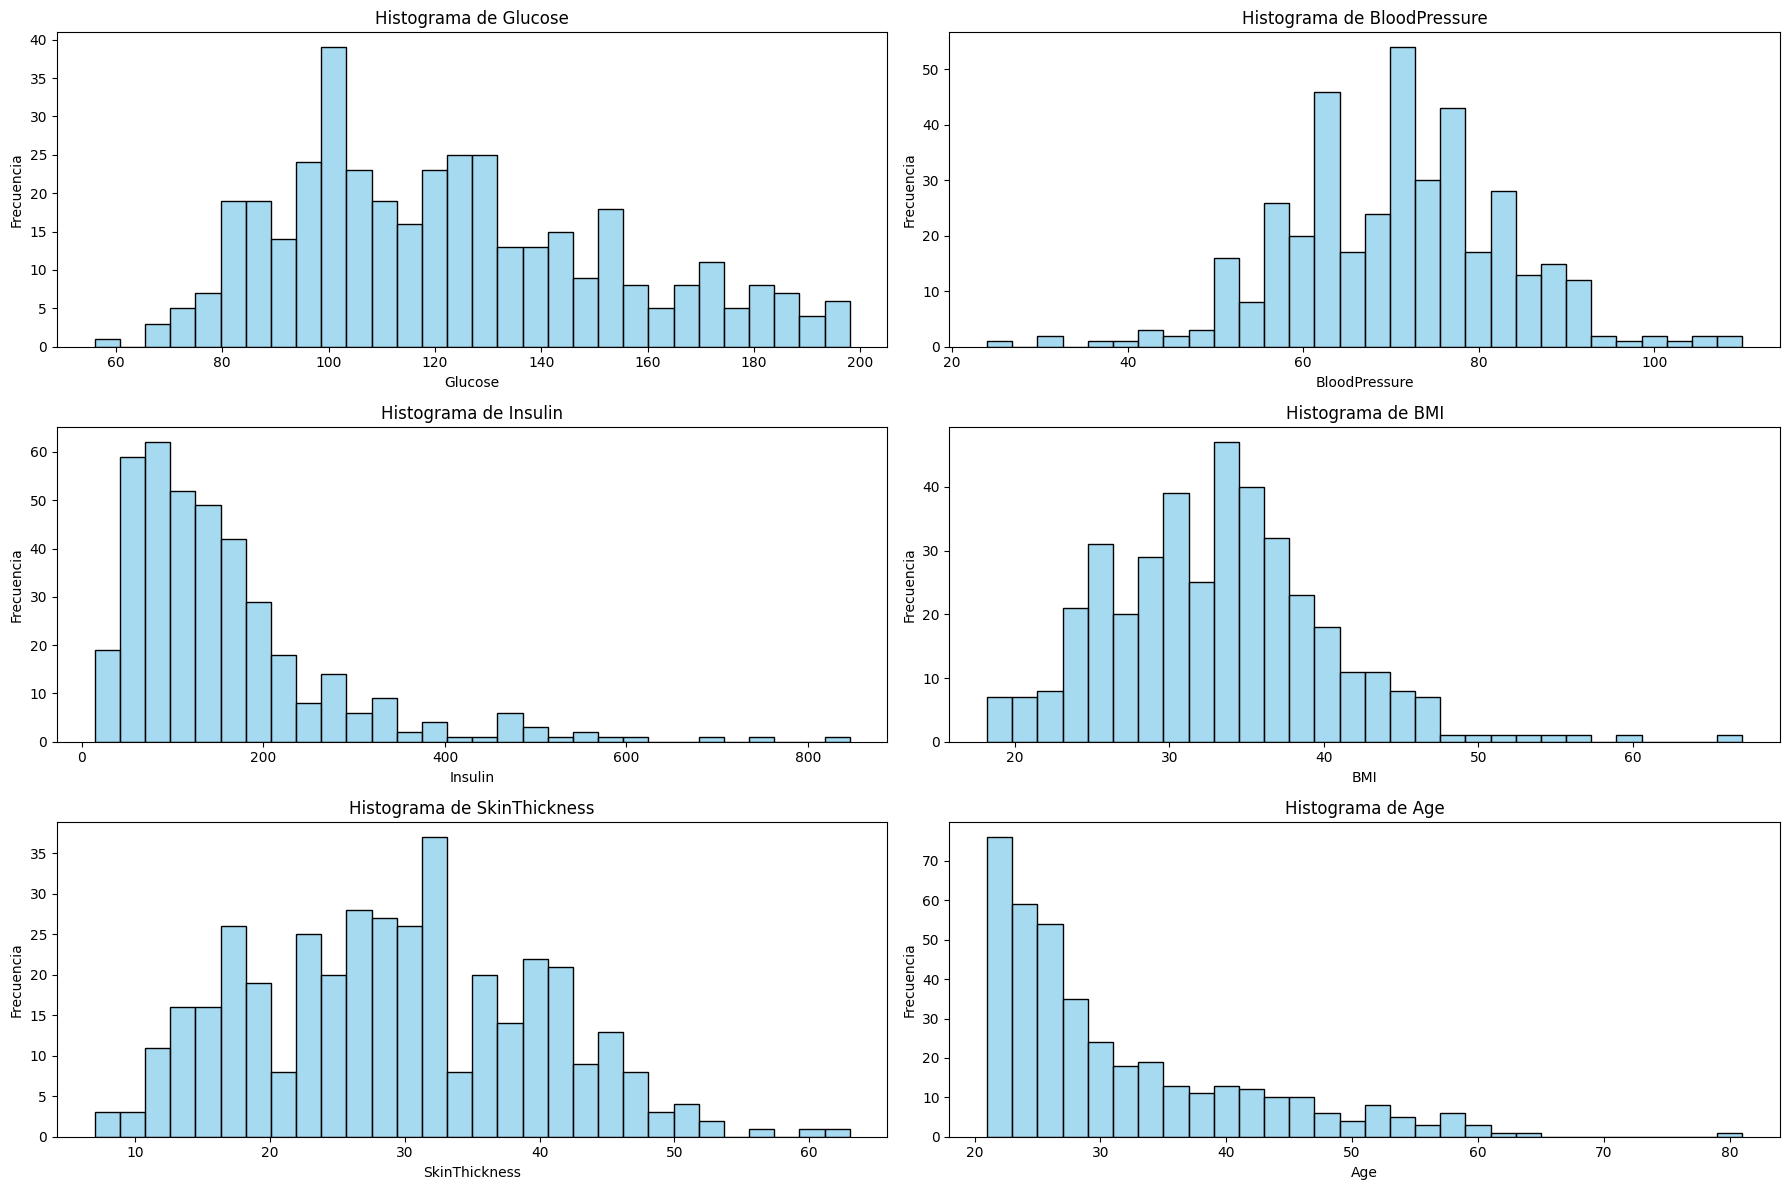

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas
variables = ["Glucose", "BloodPressure", "Insulin", "BMI", "SkinThickness", "Age"]

# Crear subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 12))

# Recorrer variables y ejes
for ax, var in zip(axes.flat, variables):
    sns.histplot(data=datacore, x=var, bins=30, kde=False, color="skyblue", ax=ax)
    ax.set_title(f"Histograma de {var}")
    ax.set_xlabel(var)
    ax.set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()


Como vemos niveles de glucosa altos esta asociado con casos positivos de diabetes.


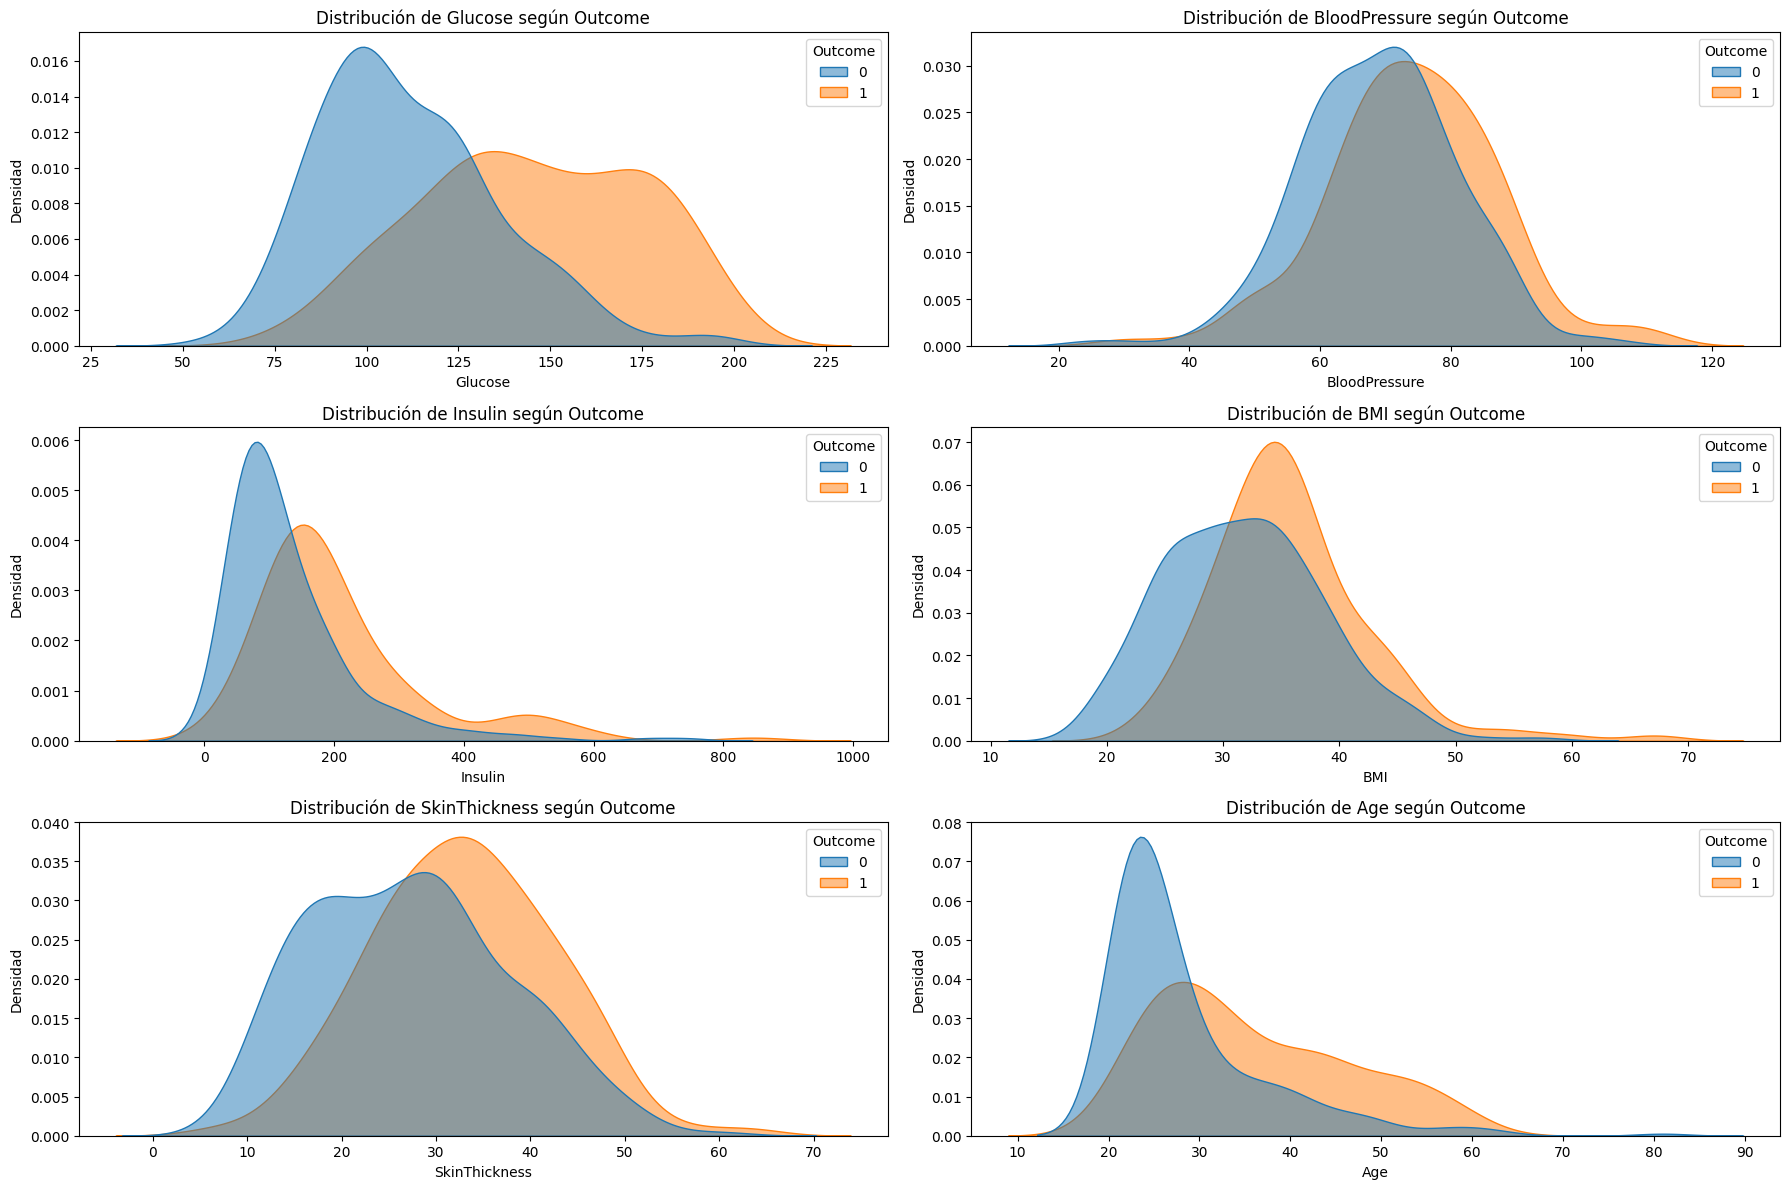

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 2, figsize=(18, 12))

# Lista de variables a graficar
variables = ["Glucose", "BloodPressure", "Insulin", "BMI", "SkinThickness", "Age"]

# Graficar cada variable
for ax, var in zip(axes.flat, variables):
    sns.kdeplot(data=datacore, x=var, hue="Outcome", fill=True, common_norm=False, alpha=0.5, ax=ax)
    ax.set_title(f"Distribución de {var} según Outcome")
    ax.set_xlabel(var)
    ax.set_ylabel("Densidad")

plt.tight_layout()
plt.show()

MODELO DE ARBOL 

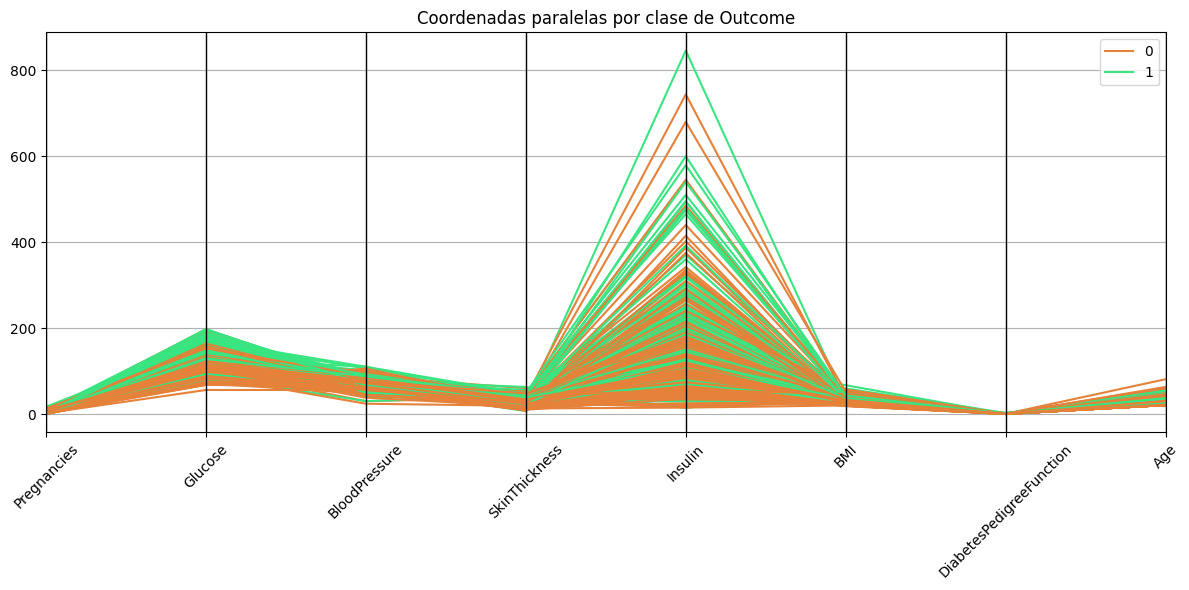

In [12]:
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Eliminar columna no numérica
datacore.drop(columns=["AgeGroup"], inplace=True)

# Gráfico de coordenadas paralelas
plt.figure(figsize=(12, 6))
parallel_coordinates(datacore, "Outcome", color=("#E58139", "#39E581", "#8139E5"))

# Rotar etiquetas de los ejes
plt.xticks(rotation=45)  # Cambia a 90 si quieres más inclinación

# Mostrar gráfico
plt.title("Coordenadas paralelas por clase de Outcome")
plt.tight_layout()
plt.show()

Es una técnica de visualización multivariada que permite comparar muchas variables numéricas al mismo tiempo. Cada línea representa una instancia (fila) del dataset y cruza varios ejes verticales (uno por variable). Se usa mucho para encontrar patrones entre clases.

Cada eje vertical representa una variable numérica del dataset:
Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age.

Cada línea representa un paciente del conjunto de datos.

El color representa la clase de la variable Outcome:

 Naranja: Outcome = 0 (No diabético)

 Verde: Outcome = 1 (Diabético)

Recomendaciones: 
               - Normalizar o escalar los datos (por ejemplo, con MinMaxScaler) para visualizar mejor. (No es tan necesario escalar variables en modelos como arbol de decisiciones)

               - Considerar reducir outliers en Insulin antes de modelar.

              - Usar este análisis como base para selección de variables.

In [13]:
from scipy.stats.mstats import winsorize

datacore['Insulin_winsorized'] = winsorize(datacore['Insulin'], limits=[0.05, 0.05]) 

La función winsorize de scipy.stats.mstats, no elimina los outliers, sino que los estás "recortando" o "modificando". La función reemplaza los valores atípicos por el percentil correspondiente según el parámetro limits que se defina.

En este caso, limits=[0.05, 0.05] significa que el 5% de los valores más bajos y el 5% de los valores más altos de la columna 'Insulin' serán modificados para que se ajusten al valor del percentil correspondiente (es decir, a los valores en los percentiles 5 y 95 de la distribución de los datos). Esto ayuda a mitigar el efecto de los outliers sin eliminarlos por completo.

In [14]:
datacore.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'Insulin_winsorized'],
      dtype='object')

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Define tus variables independientes (X) y dependiente (y)
X = datacore.drop(columns=['Outcome'], axis=1)  # Reemplaza 'columna_objetivo' por el nombre real de la variable objetivo
y = datacore["Outcome"]

# Divide el dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# Imprimir tamaños resultantes
print('Tamaño set de entrenamiento: ', X_train.shape, y_train.shape)
print('Tamaño set de prueba: ', X_test.shape, y_test.shape)

# Distribución de categorías
print('Distribución de categorías dataset original: ', y.value_counts(normalize=True))
print('Distribución de categorías dataset entrenamiento: ', y_train.value_counts(normalize=True))
print('Distribución de categorías dataset prueba: ', y_test.value_counts(normalize=True))

# Muestra las primeras filas del conjunto de entrenamiento
print(datacore["Outcome"].value_counts())
print(X.columns)
 

Tamaño set de entrenamiento:  (313, 9) (313,)
Tamaño set de prueba:  (79, 9) (79,)
Distribución de categorías dataset original:  Outcome
0    0.668367
1    0.331633
Name: proportion, dtype: float64
Distribución de categorías dataset entrenamiento:  Outcome
0    0.667732
1    0.332268
Name: proportion, dtype: float64
Distribución de categorías dataset prueba:  Outcome
0    0.670886
1    0.329114
Name: proportion, dtype: float64
Outcome
0    262
1    130
Name: count, dtype: int64
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Insulin_winsorized'],
      dtype='object')


In [16]:

model = DecisionTreeClassifier(random_state=42) 
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [17]:
predicciones = model.predict(X_test)
predicciones

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [18]:
matriz = pd.DataFrame(confusion_matrix(y_test, predicciones), columns = ["No tiene diabetes", "Tiene diabetes"], index =["No tiene diabetes", "Tiene diabetes"])
matriz

,No tiene diabetes,Tiene diabetes
No tiene diabetes,42,11
Tiene diabetes,9,17


In [19]:
accuracy_score(y_test, predicciones)

0.7468354430379747

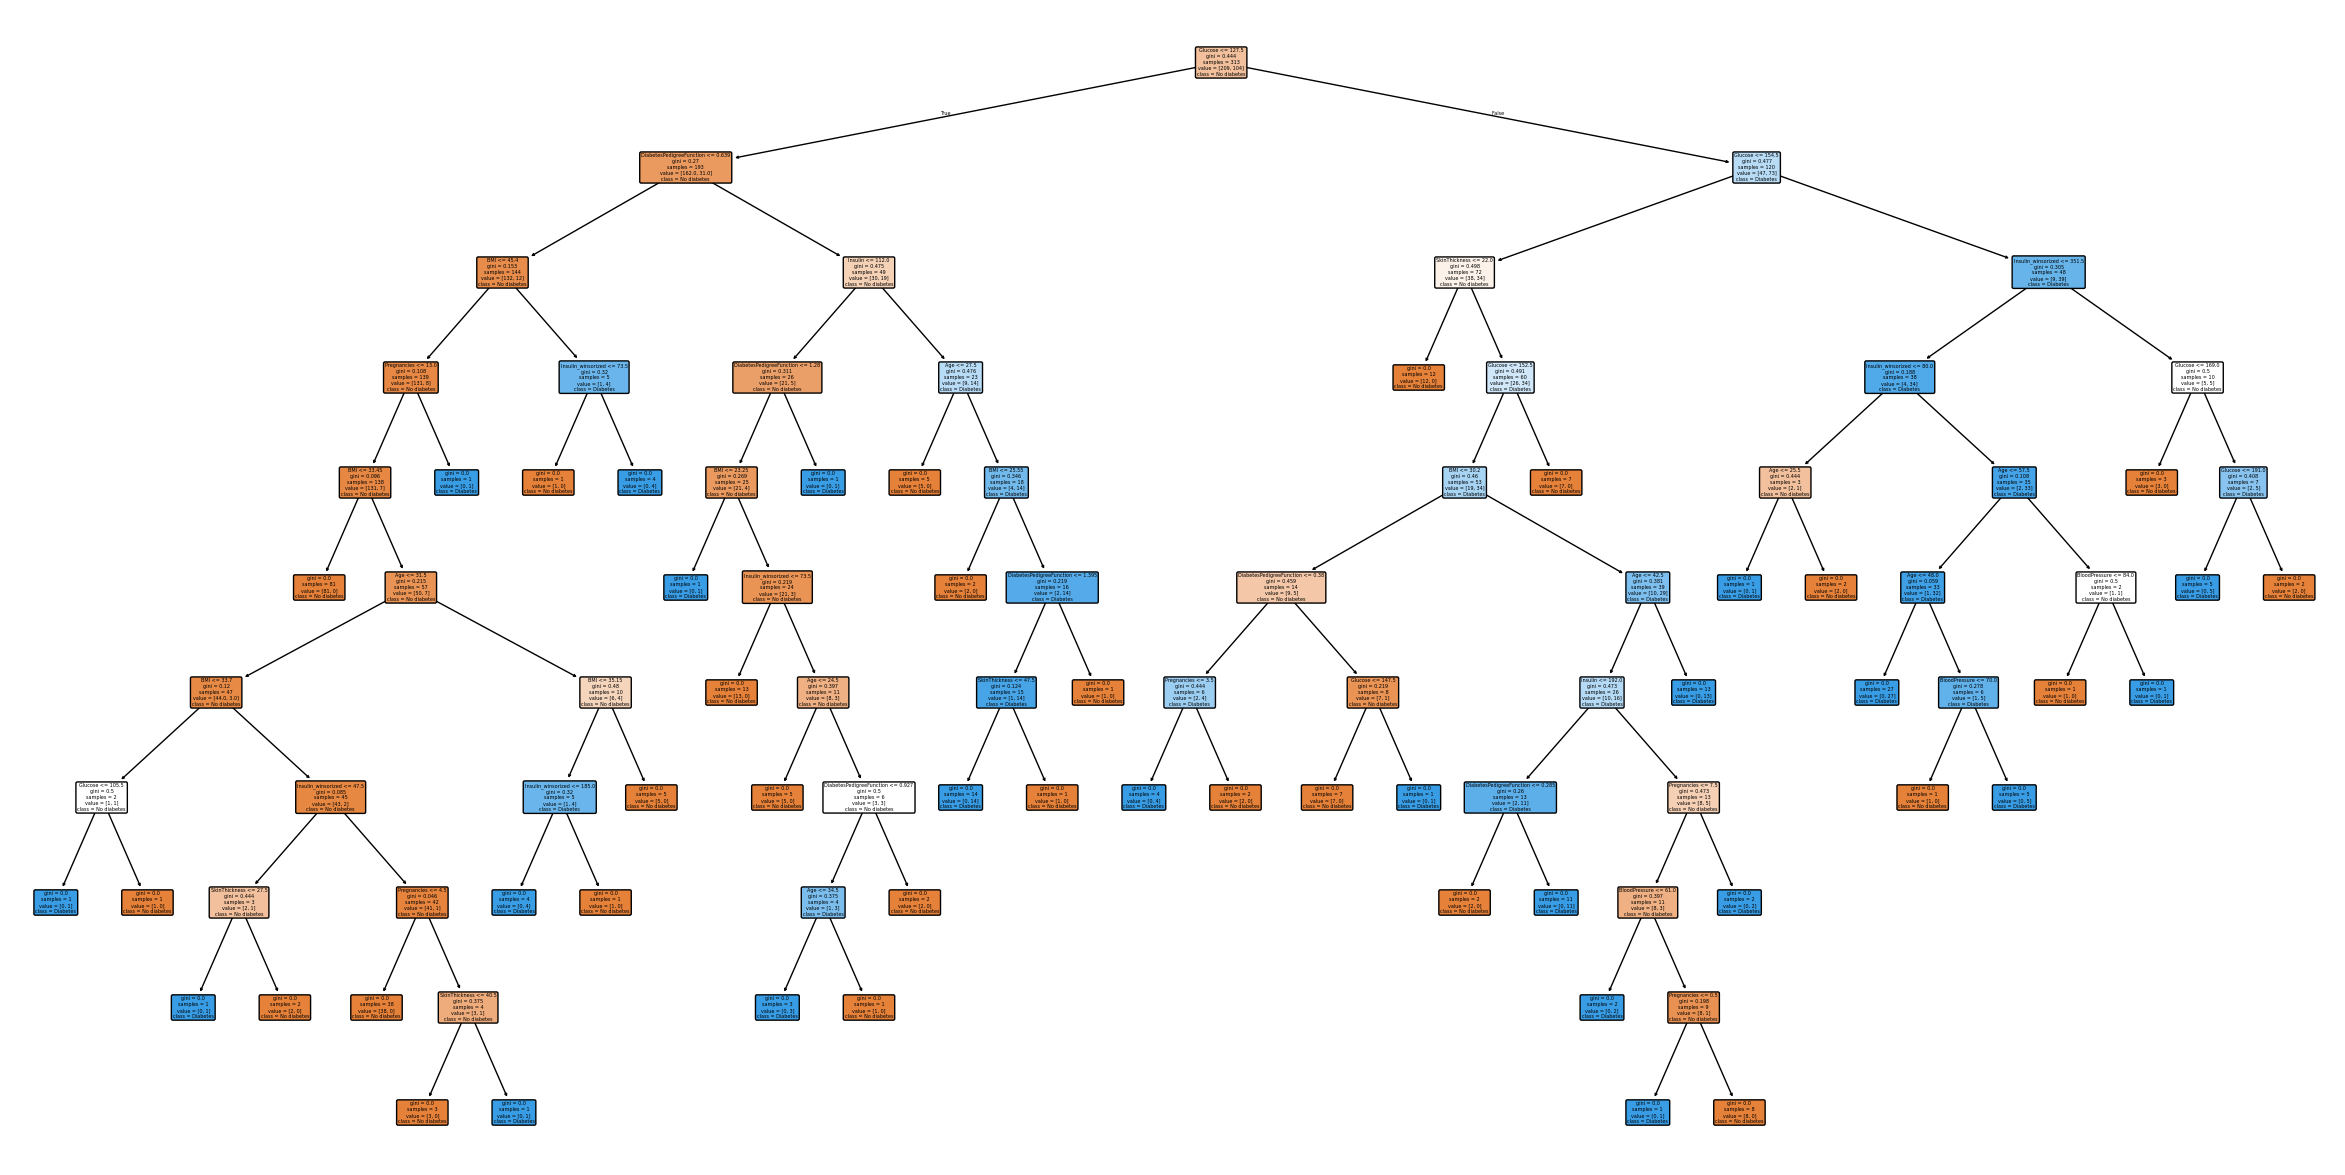

In [20]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30,15))
plot_tree(model, feature_names=X_train.columns, class_names=["No diabetes", "Diabetes"], filled=True, rounded=True,)

plt.savefig("arbol de clasificacion.png", dpi=700)

In [21]:
print("Profundidad de arbol", model.get_depth())
print("Bumero de hojas de arbol", model.get_n_leaves())

Profundidad de arbol 10
Bumero de hojas de arbol 49


In [22]:
model.feature_importances_

array([0.06102979, 0.35404127, 0.03781838, 0.08008041, 0.05040812,
       0.12667766, 0.11997365, 0.10413999, 0.06583073])

Efecto de los hiper-parámetros en el desempeño del árbol
Comencemos viendo el desempeño del árbol que creamos inicialmente, haciendo uso de la validación cruzada (k-fold cross-validation).

Como métrica de desempeño usaremos el F1-ponderado. Comencemos recordando qué son los falsos/verdaderos positivos y los falsos/verdaderos negativos:

  TP (verdaderos positivos): diabéticos detectados correctamente como diabéticos
  FP (falsos positivos): sanos detectados incorrectamente como diabéticos
  TN (verdaderos negativos): sanos detectados correctamente como sanos
  FN (falsos negativos): diabéticos detectados incorrectamente como sanos
  El precision: ¿de todos los clasificados como DIABÉTICOS qué porcentaje son realmente DIABÉTICOS?:

precision=TPTP+FP 

El recall: ¿de todos los DIABÉTICOS qué proporción fue clasificada realmente como DIABÉTICOS?

recall=TPTP+FN 

Y el F1-score combina el precision y el recall en una sola métrica:

F1=2⋅TP2⋅TP+FP+FN 

Y el F1-score ponderado simplemente modifica ligeramente las ecuaciones anteriores para compensar el desbalance de los datos.

Así que veamos el desempeño (F1-score ponderado) del árbol construido originalmente:

In [23]:
from sklearn.model_selection import StratifiedKFold,cross_val_score

skf = StratifiedKFold(shuffle=True, random_state=42)

model = DecisionTreeClassifier(random_state=42) 
scores = cross_val_score(model, X_train, y_train, cv=skf, scoring="f1_weighted")

print("F1-score ponderado entrenamiento", scores.mean())

#Entrenar arbol con un set de entrenamiento
model.fit(X_train,y_train)

#Puntaje de set de prueba
#print("F1-score ponderado prueba", score_test)

F1-score ponderado entrenamiento 0.7145798809130077


DecisionTreeClassifier(random_state=42)

In [24]:
matriz = pd.DataFrame(confusion_matrix(y_test, predicciones), columns = ["No tiene diabetes", "Tiene diabetes"], index =["No tiene diabetes", "Tiene diabetes"])
matriz

,No tiene diabetes,Tiene diabetes
No tiene diabetes,42,11
Tiene diabetes,9,17


observemos si este desempeño cambia al modificar los hiper-parámetros del árbol. Los principales hiper-parámetros son:

"max_depth": máxima profundidad del árbol (None por defecto)

"min_samples_split": mínimo número de datos para generar partición (2 por defecto)

"min_samples_leaf": mínimo número de datos que puede contener una hoja (1 por defecto)

Al modificar "max_depth", "min_samples_split" o "min_samples_leaf" haremos que el árbol sea más o menos complejo y esto afectará el desempeño.

Construyamos por ejemplo un árbol con una profundidad máxima de 5

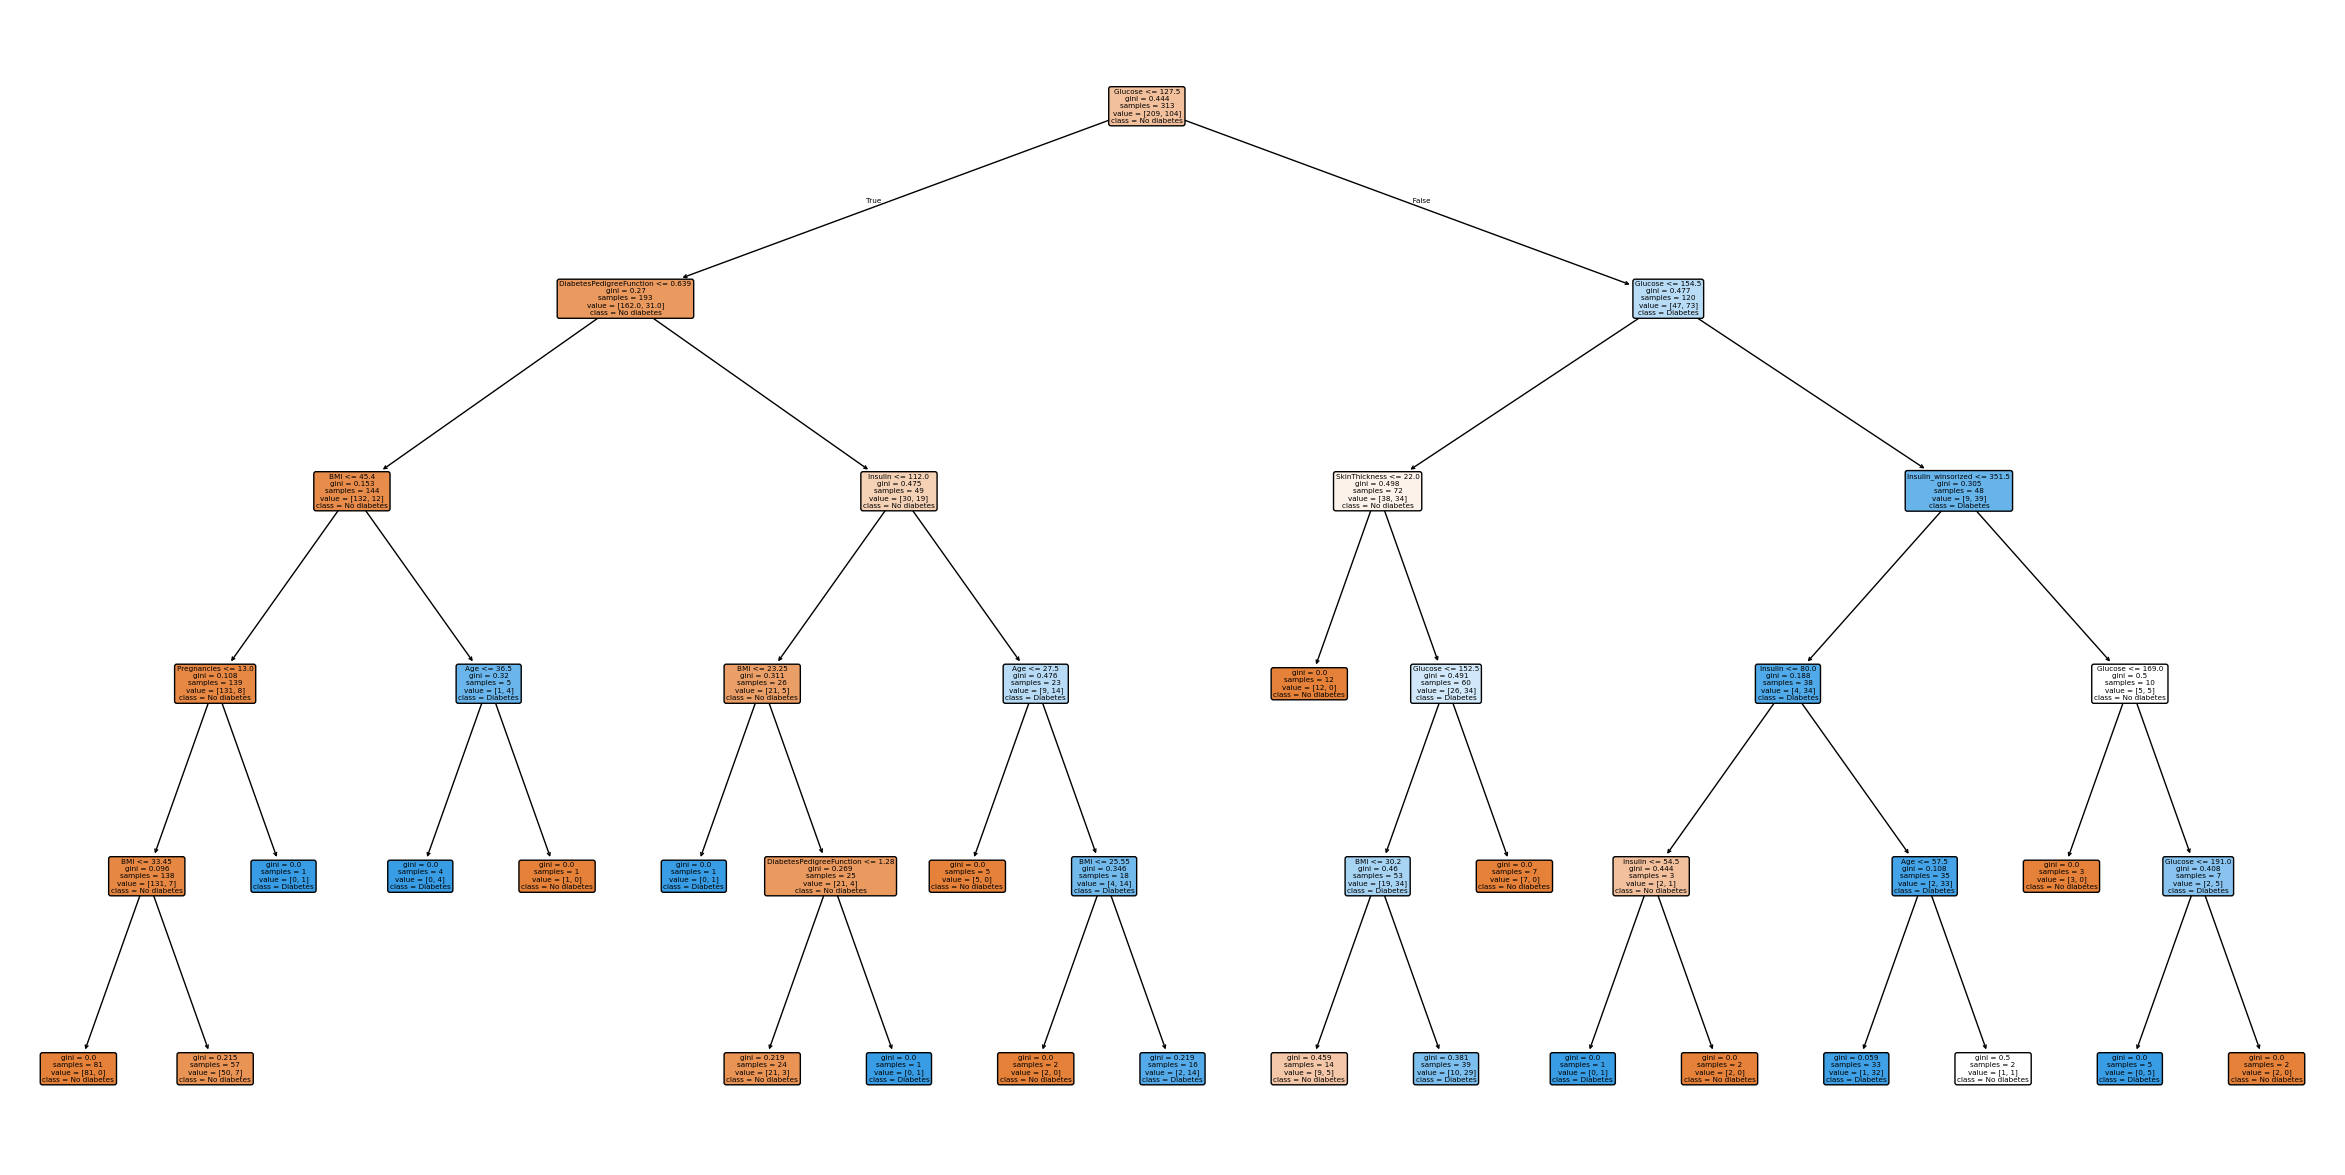

In [25]:
model = DecisionTreeClassifier(max_depth=5, random_state=42) 
model.fit(X_train, y_train)

plt.figure(figsize=(30,15))
plot_tree(model, feature_names=X_train.columns, class_names=["No diabetes", "Diabetes"], filled=True, rounded=True,)

plt.savefig("arbol de clasificacion dephh 5.png", dpi=700)

In [26]:
# Características del árbol
print('Profundidad del árbol: ', model.get_depth())
print('Número de hojas del árbol: ', model.get_n_leaves())

Profundidad del árbol:  5
Número de hojas del árbol:  22


Aqui veremos el desempeño del arbol

In [27]:
from sklearn.model_selection import StratifiedKFold,cross_val_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

model = DecisionTreeClassifier(random_state=42) 
scores = cross_val_score(model, X_train, y_train, cv=skf, scoring="f1_weighted")

print("F1-score ponderado entrenamiento", scores.mean())

#Entrenar arbol con un set de entrenamiento
model.fit(X_train,y_train)

#Puntaje de set de prueba
#print("F1-score ponderado prueba", score_test)

F1-score ponderado entrenamiento 0.7145798809130077


DecisionTreeClassifier(random_state=42)

In [28]:
matriz = pd.DataFrame(confusion_matrix(y_test, predicciones), columns = ["No tiene diabetes", "Tiene diabetes"], index =["No tiene diabetes", "Tiene diabetes"])
matriz

,No tiene diabetes,Tiene diabetes
No tiene diabetes,42,11
Tiene diabetes,9,17


GridSearchCV prueba todas las combinaciones posibles de un conjunto de hiperparámetros. Y evalúa cada una con validación cruzada. Luego selecciona la combinación que logra el mejor desempeño (en este caso, la mayor accuracy promedio).

Define una rejilla (grid) de hiperparámetros para probar:

criterion: cómo mide la impureza en los nodos (Gini o Entropía).

max_depth: qué tan profundo puede crecer el árbol.

min_samples_split: número mínimo de muestras para dividir un nodo.

min_samples_leaf: número mínimo de muestras en una hoja.

Esta combinación da 2×5×3×3 = 90 modelos diferentes que se probarán.

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Definir los hiperparámetros a probar
param_grid = {
    'criterion': ['gini', 'entropy'],          # Función de impureza
    'max_depth': [3, 5, 7, 9, None],           # Profundidad del árbol
    'min_samples_split': [2, 5, 10],           # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4]              # Mínimo de muestras por hoja
}

# Modelo base
modelo_base = DecisionTreeClassifier(random_state=42)

# Grid Search con validación cruzada de 5 folds
grid_search = GridSearchCV(estimator=modelo_base, 
                           param_grid=param_grid,
                           cv=5, 
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=1)

# Ajustar a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros
print("Mejores hiperparámetros:", grid_search.best_params_)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# Entrenar con los mejores hiperparámetros
modelo_final = DecisionTreeClassifier(
    criterion='gini',
    max_depth=7,
    min_samples_leaf=4,
    min_samples_split=10,
    random_state=42
)
modelo_final.fit(X_train, y_train)

# Predicciones
y_pred = modelo_final.predict(X_test)

# Evaluación
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("F1-score ponderado:", f1_score(y_test, y_pred, average='weighted'))

Matriz de confusión:
 [[46  7]
 [ 9 17]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85        53
           1       0.71      0.65      0.68        26

    accuracy                           0.80        79
   macro avg       0.77      0.76      0.77        79
weighted avg       0.79      0.80      0.80        79

F1-score ponderado: 0.7952930145335209


In [31]:
modelo_final = grid_search.best_estimator_
modelo_final

DecisionTreeClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

Como podemos ver La función winsorize de scipy.stats.mstats, si nos ayudo a mejorar un poco mas nuestro modelo


GUARDAR MODELO

In [32]:
import joblib

# Guardar el modelo
joblib.dump(modelo_final, 'modelo_arbol_diabetes.pkl')
print("Modelo guardado como 'modelo_arbol_diabetes.pkl'")

Modelo guardado como 'modelo_arbol_diabetes.pkl'


In [33]:
modelo_cargado = joblib.load('modelo_arbol_diabetes.pkl')